In [1]:
"""
import modules
"""

from prepare_data import prepare_df_from_mac_5_year as prepare_CCL
from prepare_data import prepare_paths as prepare_paths
from emulate_reduction import emulator_v4 as emulate
from visualize_output import vis_emulator_v1 as v1_plot
from pym import pym

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import os

dir(prepare_paths)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'colors',
 'combine_azure_ctax',
 'np',
 'os',
 'output_costs_timer',
 'pd',
 'plot_MAC',
 'plt',
 'prepare_data',
 'pym',
 'truncate_colormap',
 'world_MAC_data']

In [2]:
"""
IAMC database 
"""

FILENAME_IAMC = 'iamc15_scenario_data_world_r2.0.xlsx'
FILENAME_MEAN_TEMP = 'mean_temp.csv'

PATH_IAMC = 'C:/Users/toonv/Documents/PBL/Data/IAMC_paths/'
PATH_IAMC_MYM = 'C:/Users/toonv/Documents/PBL/Data/IAMC_paths_mym/'
PATH_IAMC_CSV = 'C:/Users/toonv/Documents/PBL/Data/IAMC_paths_csv/'

# new paths, from IAMC databese
IAMC_database = pd.read_excel(PATH_IAMC + FILENAME_IAMC, sheet_name='data')

C:\Users\toonv\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\toonv\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\toonv\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\toonv\Anaconda3\lib\site-packages\pan

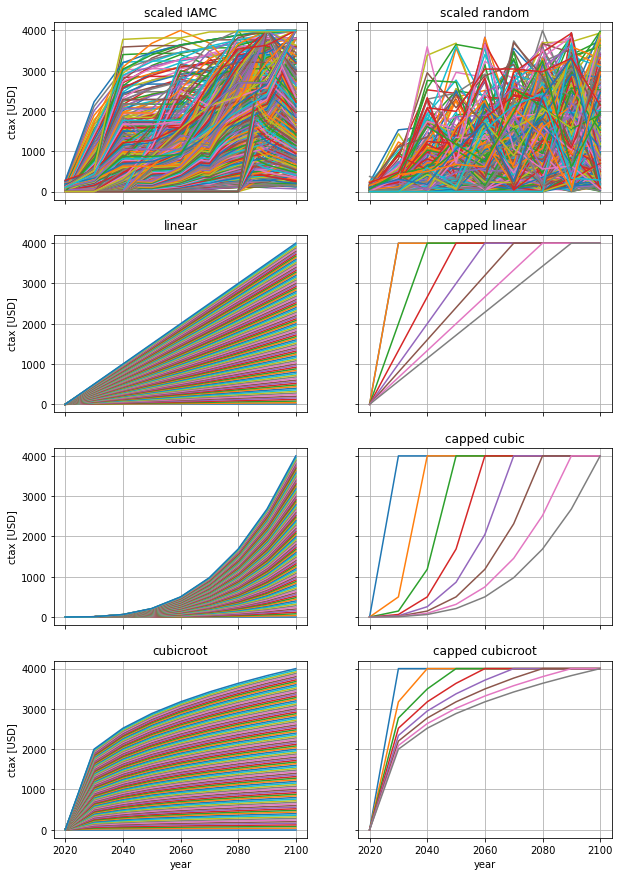

In [35]:
"""
prepare data from IAMC database
"""

reload(prepare_paths)

YEAR_STEP = 10
MAX_CTAX = 4000
MODELS = ['IMAGE']
STEP_CTAX = 200
STEP_CTAX_LIN_PATHS = 40
MAX_RAND = 2

raw_data = prepare_paths.prepare_data(IAMC_database)

carbon_prices, models_ctax = raw_data.filter_iamc(YEAR_STEP, 'Price|Carbon', MAX_CTAX, MODELS)
# mean_temp, models_temp = raw_data.filter_iamc(year_step, 'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED',
#                                               MAX_CTAX, MODELS)

# scaled and lin ctax
scaled_ctax_paths = raw_data.scale_ctax(STEP_CTAX)
lin_ctax_paths = raw_data.get_linear(MAX_CTAX, STEP_CTAX_LIN_PATHS)
sparse_ctax_paths = raw_data.sparse_linear(MAX_CTAX)
random_ctax_paths = raw_data.get_random(MAX_RAND, MAX_CTAX)
cubic_ctax_paths = raw_data.get_cubic(MAX_CTAX)
cubicroot_ctax_paths = raw_data.get_cubicroot(MAX_CTAX)
sparse_cubicroot_paths = raw_data.sparse_cubicroot(MAX_CTAX)
sparse_cubic_paths = raw_data.sparse_cubic(MAX_CTAX)

# merged dataframe
# all_paths = raw_data.merge_all(PATH_IAMC, 'all_ctax_paths.xlsx')
# raw_data.plot_ctax_paths(all_paths)

ctaxes = [scaled_ctax_paths, random_ctax_paths, lin_ctax_paths, sparse_ctax_paths, cubic_ctax_paths, sparse_cubic_paths,
         cubicroot_ctax_paths, sparse_cubicroot_paths]

for index, ctax in enumerate(ctaxes):
    
    rows = len(ctaxes)/2
    
    plt.subplot(rows,2,index + 1)
    
    ctax.T.plot(legend=False, ax=plt.gca(), sharex='year', sharey='ctax [USD]', title=ctax.method, grid=True,
               figsize=(10,15), ylabel='ctax [USD]', xlabel='year')

# save data to path
# raw_data.prepare_mym(all_paths, PATH_IAMC_MYM, PATH_IAMC_CSV, 'ctax_train_')



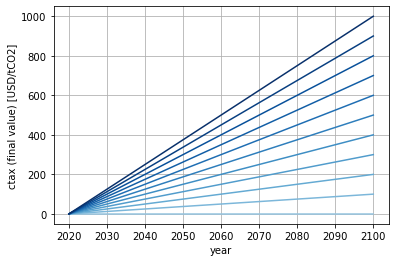

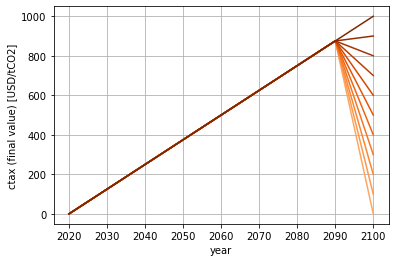

In [4]:
"""
Dataframe for costs experiment
"""

MAX_CTAX_COSTS = 1000
STEP_CTAX_COSTS = 100
LIN_PATH_COSTS = 'C:/Users/toonv/Documents/PBL/Data/paths_costs/lin_paths'
TREE_PATH_COSTS = 'C:/Users/toonv/Documents/PBL/Data/paths_costs/tree_paths'
PATH_COSTS_CSV = 'C:/Users/toonv/Documents/PBL/Data/costs_paths_csv/'

lin_ctax_paths_costs = raw_data.get_linear(MAX_CTAX_COSTS, STEP_CTAX_COSTS)
raw_data.plot_ctax_paths(lin_ctax_paths_costs, 'Blues')

tree_ctax_paths_costs = raw_data.get_tree_costs(MAX_CTAX_COSTS, STEP_CTAX_COSTS)
raw_data.plot_ctax_paths(tree_ctax_paths_costs, 'Oranges')

# raw_data.prepare_mym(lin_ctax_paths_costs, LIN_PATH_COSTS, PATH_COSTS_CSV, 'ctax_train_')
# raw_data.prepare_mym(tree_ctax_paths_costs, TREE_PATH_COSTS, PATH_COSTS_CSV, 'ctax_train_')

